# Final Project - Data Cleaning
## 90-803 Machine Learning Foundations with Python (Spring 2023)
### Team Name: Car Crash Master
### Member Name: Zhexuan Huang, Yi Liu, Xinqiao Luo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.metrics import r2_score 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Question 1: Can we classity the crash severity level of an accident based on factors like whether the driver is young or not, or is distracted or not? If there is a correaltion between some variables, what are the factors that most influence the severity of a crash?
**- Classification - target variable: MAX_SEVERITY_LEVEL**
## Question 2:  We have a binary variable that indicates whether serious injuries were involved in the accident. Are the injuries related to the driver's behavior, e.g. drug, alcohol etc.?
**- Prediction - target variable: INJURY_OR_FATAL**
## Question 3: Can we classify the severity of vehicle damage in accidents based on factors like speed limits, location, and lighting conditions? If so, what environmental factors have the most contribution to the result?
**- Classification - target variable: DAMAGE_IND**


# Q1

In [2]:
df2017=pd.read_csv('Raw Data/Statewide_2017/CRASH_2017_Statewide.csv')
df2018=pd.read_csv('Raw Data/Statewide_2018/CRASH_2018_Statewide.csv')
df2019=pd.read_csv('Raw Data/Statewide_2019/CRASH_2019_Statewide.csv')
df2020=pd.read_csv('Raw Data/Statewide_2020/CRASH_2020_Statewide.csv')
df2021=pd.read_csv('Raw Data/Statewide_2021/CRASH_2021_Statewide.csv')

According to the information provided by PennDOT, the columns of these datasets should be the same. Here we double check to make sure there is no mistake when merging the data later.

In [3]:
if df2017.columns.equals(df2018.columns) and \
   df2017.columns.equals(df2019.columns) and \
   df2017.columns.equals(df2020.columns) and \
   df2017.columns.equals(df2021.columns):
    print("The columns of the DataFrame are same")
else:
    print("The columns of a DataFrame are not same")

The columns of the DataFrame are same


In [4]:
df2017.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED
0,2359.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
1,1432.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
2,17.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
3,200.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,7,,NaN,NaN,NaN
4,55.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN


**Merge the data of these five years**

In [5]:
crash_2017_2021 = pd.concat([df2017, df2018, df2019, df2020, df2021])
crash_2017_2021.sample(10)

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED
4161,1740.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
125350,1220.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
10806,1643.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,7,,NaN,NaN,NaN
22011,1321.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
107682,1405.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1415.0,03,03,NaN,NaN,NaN
91073,723.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,805.0,NaN,3,NaN,N,N
71614,10.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,504.0,NaN,3,NaN,N,N
16757,15.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,,NaN,NaN,NaN
40525,542.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,10,,NaN,NaN,NaN
82528,2329.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3.0,7,,NaN,N,N


### Check if there are null values

In [6]:
crash_2017_2021.isnull().sum()

ARRIVAL_TM                         1760
AUTOMOBILE_COUNT                      0
BELTED_DEATH_COUNT                    0
BELTED_SUSP_SERIOUS_INJ_COUNT         0
BICYCLE_COUNT                         0
                                  ...  
WEATHER1                         117904
WEATHER2                              1
WZ_WORKERS_INJ_KILLED            602213
SECONDARY_CRASH                  418662
INTERSECTION_RELATED             464929
Length: 99, dtype: int64

**Calculate the percentage of missing values.**

In [7]:
percentages = crash_2017_2021.isnull().sum()*100 / crash_2017_2021.shape[0]
missing_data = pd.DataFrame({'percent_missing': percentages})
missing_data = missing_data.sort_values(by='percent_missing', ascending=False)
missing_data.head(23)

,percent_missing
WZ_WORKERS_INJ_KILLED,99.596792
WZ_CLOSE_DETOUR,99.129581
SPEC_JURIS_CD,99.109734
RDWY_SURF_TYPE_CD,99.109238
WZ_MOVING,99.104111
WZ_FLAGGER,99.097000
WZ_OTHER,99.084761
WZ_SHLDER_MDN,98.987019
WZ_LN_CLOSURE,98.967007
WORK_ZONE_LOC,98.700407


For the first 22 columns (i.e., from WZ_WORKERS_INJ_KILLED to NTFY_HIWY_MAINT), the percentage of missing values is higher than 10%, so we choose to DROP them.

In [8]:
missing_columns = missing_data.head(22).index.tolist() # Select the column names of the 22 columns with the highest missing rate
crash_2017_2021 = crash_2017_2021.drop(missing_columns, axis=1)
crash_2017_2021.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,UNB_DEATH_COUNT,UNB_SUSP_SERIOUS_INJ_COUNT,UNBELTED_OCC_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,URBAN_RURAL,VAN_COUNT,VEHICLE_COUNT,WORK_ZONE_IND,WEATHER2
0,2359.0,2,0,0,0,0,0,0,0,0,...,0,0,0,2,0,3,0,2,N,
1,1432.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,2,N,
2,17.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,3,N,
3,200.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,2,N,
4,55.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,2,N,


Check the columns with missing data again.

In [9]:
null_columns = crash_2017_2021.columns[crash_2017_2021.isnull().any()].tolist()
null_columns 

['ARRIVAL_TM',
 'DEC_LAT',
 'DEC_LONG',
 'DISPATCH_TM',
 'HORSE_BUGGY_COUNT',
 'HOUR_OF_DAY',
 'LATITUDE',
 'LONGITUDE',
 'RELATION_TO_ROAD',
 'ROAD_CONDITION',
 'SCH_BUS_IND',
 'SCH_ZONE_IND',
 'TCD_FUNC_CD',
 'TIME_OF_DAY',
 'WEATHER2']

We carefully selected variables that are likely to have an impact on severity. We eliminated unlikely variables, resulting in a final set of variables that will provide meaningful insights. See below for the selected variables.

In [10]:
crash = crash_2017_2021[['CRN','MAX_SEVERITY_LEVEL','CRASH_YEAR', 'HOUR_OF_DAY', 'ILLUMINATION','ROAD_CONDITION',
               'UNBELTED_OCC_COUNT', 'WORK_ZONE_IND']]
crash.head()

,CRN,MAX_SEVERITY_LEVEL,CRASH_YEAR,HOUR_OF_DAY,ILLUMINATION,ROAD_CONDITION,UNBELTED_OCC_COUNT,WORK_ZONE_IND
0,2013012558,8,2017,23.0,3,1.0,0,N
1,2014032783,0,2017,14.0,1,1.0,0,N
2,2017000001,9,2017,0.0,3,1.0,0,N
3,2017000009,0,2017,1.0,3,9.0,0,N
4,2017000010,0,2017,0.0,3,1.0,0,N


### Verify the type of each variable.

In [11]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604651 entries, 0 to 117919
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CRN                 604651 non-null  int64  
 1   MAX_SEVERITY_LEVEL  604651 non-null  int64  
 2   CRASH_YEAR          604651 non-null  int64  
 3   HOUR_OF_DAY         604647 non-null  float64
 4   ILLUMINATION        604651 non-null  int64  
 5   ROAD_CONDITION      604650 non-null  float64
 6   UNBELTED_OCC_COUNT  604651 non-null  int64  
 7   WORK_ZONE_IND       604651 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 41.5+ MB


In [12]:
crash['WORK_ZONE_IND'] = crash['WORK_ZONE_IND'].replace({'N': 0, 'Y': 1})

In [13]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604651 entries, 0 to 117919
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CRN                 604651 non-null  int64  
 1   MAX_SEVERITY_LEVEL  604651 non-null  int64  
 2   CRASH_YEAR          604651 non-null  int64  
 3   HOUR_OF_DAY         604647 non-null  float64
 4   ILLUMINATION        604651 non-null  int64  
 5   ROAD_CONDITION      604650 non-null  float64
 6   UNBELTED_OCC_COUNT  604651 non-null  int64  
 7   WORK_ZONE_IND       604651 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 41.5 MB


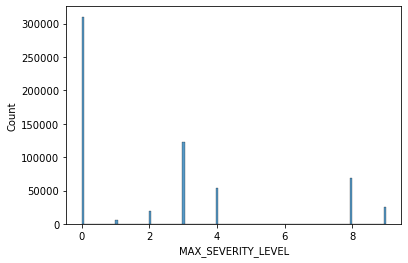

In [14]:
sns.histplot(data=crash['MAX_SEVERITY_LEVEL']);

According to the distribution of MAX_SEVERITY_LEVEL, we found that there was an imbalance between categories and did the corresponding processing.

## Flag Data

In [15]:
fl2017=pd.read_csv('Raw Data/Statewide_2017/FLAG_2017_Statewide.csv')
fl2018=pd.read_csv('Raw Data/Statewide_2018/FLAG_2018_Statewide.csv')
fl2019=pd.read_csv('Raw Data/Statewide_2019/FLAG_2019_Statewide.csv')
fl2020=pd.read_csv('Raw Data/Statewide_2020/FLAG_2020_Statewide.csv')
fl2021=pd.read_csv('Raw Data/Statewide_2021/FLAG_2021_Statewide.csv')

In [16]:
fl=pd.concat([fl2017, fl2018, fl2019,fl2020,fl2021], ignore_index=True)
fl.head()

,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,COMM_VEHICLE,...,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,WET_ROAD,WORK_ZONE,CHILD_PASSENGER,MATURE_DRIVER,YOUNG_DRIVER,RAMP
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Based on common sense, we have carefully chosen the following variables as our candidates for analysis.

In [17]:
flag = fl[['CRN','AGGRESSIVE_DRIVING', 'ALCOHOL_RELATED', 'CELL_PHONE', 'CORE_NETWORK','CURVED_ROAD','DISTRACTED',
           'DRUGGED_DRIVER','YOUNG_DRIVER','MATURE_DRIVER','SPEEDING_RELATED','URBAN']]
flag.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,CELL_PHONE,CORE_NETWORK,CURVED_ROAD,DISTRACTED,DRUGGED_DRIVER,YOUNG_DRIVER,MATURE_DRIVER,SPEEDING_RELATED,URBAN
0,2017062108,1,0,0,0,0,0,0,0,0,0,1
1,2017063268,1,0,0,0,0,0,0,1,1,0,1
2,2017063427,1,0,0,0,0,0,0,1,0,0,1
3,2017067591,1,0,0,0,0,0,0,1,0,0,1
4,2017067837,0,0,0,0,0,0,0,0,0,0,1


In [18]:
len(flag)

604651

Same length as the crash dataset

### Check if there are null values

In [19]:
flag.isnull().sum()

CRN                   0
AGGRESSIVE_DRIVING    0
ALCOHOL_RELATED       0
CELL_PHONE            0
CORE_NETWORK          0
CURVED_ROAD           0
DISTRACTED            0
DRUGGED_DRIVER        0
YOUNG_DRIVER          0
MATURE_DRIVER         0
SPEEDING_RELATED      0
URBAN                 0
dtype: int64

### Verify the type of each variable.

In [20]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604651 entries, 0 to 604650
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   CRN                 604651 non-null  int64
 1   AGGRESSIVE_DRIVING  604651 non-null  int64
 2   ALCOHOL_RELATED     604651 non-null  int64
 3   CELL_PHONE          604651 non-null  int64
 4   CORE_NETWORK        604651 non-null  int64
 5   CURVED_ROAD         604651 non-null  int64
 6   DISTRACTED          604651 non-null  int64
 7   DRUGGED_DRIVER      604651 non-null  int64
 8   YOUNG_DRIVER        604651 non-null  int64
 9   MATURE_DRIVER       604651 non-null  int64
 10  SPEEDING_RELATED    604651 non-null  int64
 11  URBAN               604651 non-null  int64
dtypes: int64(12)
memory usage: 55.4 MB


No null values and all data types are ideal.

### Merge the crash and flag dataset

In [21]:
crash_flag = pd.merge(crash, flag, on='CRN', how='inner')
crash_flag.head()

,CRN,MAX_SEVERITY_LEVEL,CRASH_YEAR,HOUR_OF_DAY,ILLUMINATION,ROAD_CONDITION,UNBELTED_OCC_COUNT,WORK_ZONE_IND,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,CELL_PHONE,CORE_NETWORK,CURVED_ROAD,DISTRACTED,DRUGGED_DRIVER,YOUNG_DRIVER,MATURE_DRIVER,SPEEDING_RELATED,URBAN
0,2013012558,8,2017,23.0,3,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2014032783,0,2017,14.0,1,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2017000001,9,2017,0.0,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2017000009,0,2017,1.0,3,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2017000010,0,2017,0.0,3,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1


Since the numerical size of the code of MAX_SEVERITY_LEVEL cannot be used directly to determine the severity of a crash, we re-ranked it.

In the original dataset:
0 – Property Damage Only; 
1 – Fatal; 
2 – Suspected Serious Injury; 
3 – Suspected Minor Injury; 
4 – Possible Injury; 
8 – Injury – Unknown Severity; 
9 – Unknown if Injured

In [22]:
def level_tranfer(level):
    if level == 0 or level == 4:
        return 1 # represent Low risk
    elif 8 <= level <= 9 or level==3:
        return 2 # represent Medium risk
    elif 1 <= level <= 2:
        return 3 # represent High risk
crash_flag['MAX_SEVERITY_LEVEL'] = crash_flag['MAX_SEVERITY_LEVEL'].apply(level_tranfer)
crash_flag.sample(5)

,CRN,MAX_SEVERITY_LEVEL,CRASH_YEAR,HOUR_OF_DAY,ILLUMINATION,ROAD_CONDITION,UNBELTED_OCC_COUNT,WORK_ZONE_IND,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,CELL_PHONE,CORE_NETWORK,CURVED_ROAD,DISTRACTED,DRUGGED_DRIVER,YOUNG_DRIVER,MATURE_DRIVER,SPEEDING_RELATED,URBAN
375334,2019132142,1,2019,1.0,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
582778,2021108276,3,2021,22.0,3,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1
434354,2020060042,2,2020,6.0,1,1.0,1,0,1,0,0,0,0,0,0,0,0,1,0
148406,2018025810,1,2018,9.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
398120,2020020748,1,2020,14.0,1,9.0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
crash_flag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604653 entries, 0 to 604652
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CRN                 604653 non-null  int64  
 1   MAX_SEVERITY_LEVEL  604653 non-null  int64  
 2   CRASH_YEAR          604653 non-null  int64  
 3   HOUR_OF_DAY         604649 non-null  float64
 4   ILLUMINATION        604653 non-null  int64  
 5   ROAD_CONDITION      604652 non-null  float64
 6   UNBELTED_OCC_COUNT  604653 non-null  int64  
 7   WORK_ZONE_IND       604653 non-null  int64  
 8   AGGRESSIVE_DRIVING  604653 non-null  int64  
 9   ALCOHOL_RELATED     604653 non-null  int64  
 10  CELL_PHONE          604653 non-null  int64  
 11  CORE_NETWORK        604653 non-null  int64  
 12  CURVED_ROAD         604653 non-null  int64  
 13  DISTRACTED          604653 non-null  int64  
 14  DRUGGED_DRIVER      604653 non-null  int64  
 15  YOUNG_DRIVER        604653 non-nul

### Data points per class
Check how many classes we have

In [24]:
crash_flag['MAX_SEVERITY_LEVEL'].value_counts()

1    363701
2    216489
3     24463
Name: MAX_SEVERITY_LEVEL, dtype: int64

Explore the relationships between different variables.

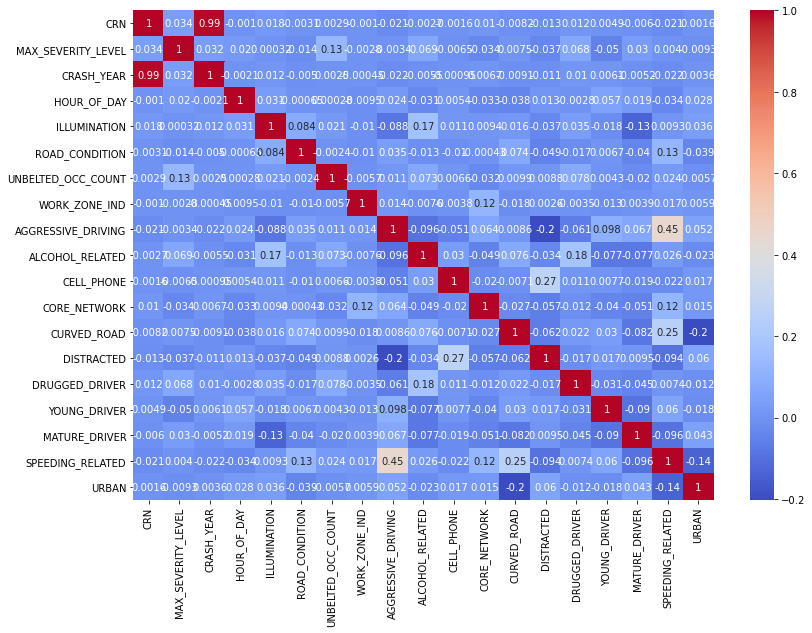

In [25]:
plt.figure(figsize=(13, 9))
corr_matrix = crash_flag.corr()
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)
plt.show()

**Select variables with relative high correlation with the target variable**

In [26]:
corr_scores = corr_matrix['MAX_SEVERITY_LEVEL'].abs().sort_values(ascending=False)
corr_scores

MAX_SEVERITY_LEVEL    1.000000
UNBELTED_OCC_COUNT    0.129060
ALCOHOL_RELATED       0.068659
DRUGGED_DRIVER        0.067694
YOUNG_DRIVER          0.049871
DISTRACTED            0.037203
CRN                   0.034281
CORE_NETWORK          0.033717
CRASH_YEAR            0.032321
MATURE_DRIVER         0.030106
HOUR_OF_DAY           0.020342
ROAD_CONDITION        0.014147
URBAN                 0.009322
CURVED_ROAD           0.007533
CELL_PHONE            0.006530
SPEEDING_RELATED      0.003980
AGGRESSIVE_DRIVING    0.003443
WORK_ZONE_IND         0.002766
ILLUMINATION          0.000324
Name: MAX_SEVERITY_LEVEL, dtype: float64

According to corralation coefficient, we decide to keep the variables with correlation score greater than 0.02. 

In [27]:
top_10_var = corr_scores.head(10).index.tolist()
crash_flag = crash_flag[top_10_var]
crash_flag.head()

,MAX_SEVERITY_LEVEL,UNBELTED_OCC_COUNT,ALCOHOL_RELATED,DRUGGED_DRIVER,YOUNG_DRIVER,DISTRACTED,CRN,CORE_NETWORK,CRASH_YEAR,MATURE_DRIVER
0,2,0,0,0,0,0,2013012558,0,2017,0
1,1,0,0,0,0,0,2014032783,0,2017,0
2,2,0,0,0,0,0,2017000001,0,2017,0
3,1,0,0,0,0,0,2017000009,0,2017,0
4,1,0,0,0,0,1,2017000010,0,2017,0


In [28]:
crash_flag=crash_flag.drop('CRN',axis=1)

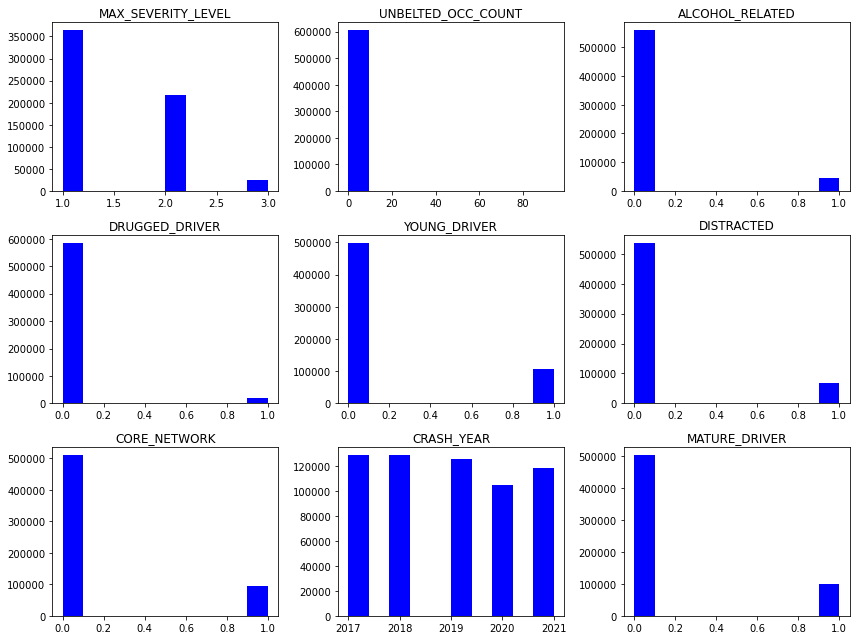

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axs = axs.flatten()

# Loop over each numerical column in the dataframe and create a histogram subplot
for i, column in enumerate(crash_flag.columns):
    axs[i].hist(crash_flag[column], bins=10, color='blue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [30]:
crash_flag.columns

Index(['MAX_SEVERITY_LEVEL', 'UNBELTED_OCC_COUNT', 'ALCOHOL_RELATED',
       'DRUGGED_DRIVER', 'YOUNG_DRIVER', 'DISTRACTED', 'CORE_NETWORK',
       'CRASH_YEAR', 'MATURE_DRIVER'],
      dtype='object')

We want to use downsample to deal with unblanced data since we have million level data

In [31]:
# first denote the unbalanced columns
unbalanced_cols=['UNBELTED_OCC_COUNT', 'ALCOHOL_RELATED',
       'DRUGGED_DRIVER', 'YOUNG_DRIVER', 'DISTRACTED', 'CORE_NETWORK',
       'MATURE_DRIVER']

We tried to downsample the data but we find that this trial is a failure because there is no intersection among those minority in multiple unbalanced column

In [32]:
df_downsampled = crash_flag.copy()
for col in unbalanced_cols:
    classes = df_downsampled[col].unique()
    for c in classes:
        df_majority = df_downsampled[(df_downsampled[col] != c) & (df_downsampled[col] == df_downsampled[col])]
        df_minority = df_downsampled[df_downsampled[col] == c]
        n_samples = min(len(df_majority), len(df_minority))
        df_majority_downsampled = resample(df_majority, replace=False, n_samples=n_samples, random_state=42)
        df_downsampled = pd.concat([df_majority_downsampled, df_minority])
        
for col in unbalanced_cols:
    print(df_downsampled[col].value_counts())


Series([], Name: UNBELTED_OCC_COUNT, dtype: int64)
Series([], Name: ALCOHOL_RELATED, dtype: int64)
Series([], Name: DRUGGED_DRIVER, dtype: int64)
Series([], Name: YOUNG_DRIVER, dtype: int64)
Series([], Name: DISTRACTED, dtype: int64)
Series([], Name: CORE_NETWORK, dtype: int64)
Series([], Name: MATURE_DRIVER, dtype: int64)


## Pre-liminary Test

              precision    recall  f1-score   support

           1       0.63      0.88      0.73     72780
           2       0.48      0.08      0.13     43334
           3       0.11      0.28      0.16      4817

    accuracy                           0.57    120931
   macro avg       0.40      0.41      0.34    120931
weighted avg       0.55      0.57      0.49    120931



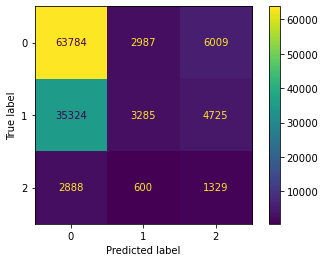

In [33]:
col=['UNBELTED_OCC_COUNT', 'ALCOHOL_RELATED',
       'DRUGGED_DRIVER', 'YOUNG_DRIVER', 'DISTRACTED', 'CORE_NETWORK',
       'CRASH_YEAR', 'MATURE_DRIVER']
X=crash_flag[col]
y=crash_flag['MAX_SEVERITY_LEVEL']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=6)
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
cm_gnb = confusion_matrix(y_test,y_pred_gnb)
display_cm_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)
display_cm_gnb.plot();
print(classification_report(y_test, y_pred_gnb))

We can see that the model has an overall accuracy of 0.57. For the precision values, we can see that the model performed reasonably well for class label 1, with a precision of 0.63. However, for class label 2, the precision is relatively low at 0.48.
For class label 3, both precision and recall values are relatively low, indicating that the model has some difficulty to correctly predict this class.

In [34]:
crash_flag.to_csv('Q1.csv',encoding='utf-8')

# Q2

We have selectively retained specific columns from the original dataset to focus on the most relevant factors associated with causing injury or death in car accidents.

In [35]:
fatal = fl[['AGGRESSIVE_DRIVING', 'ALCOHOL_RELATED', 'CELL_PHONE', 'CORE_NETWORK','CURVED_ROAD','DISTRACTED',
           'DRUGGED_DRIVER','YOUNG_DRIVER','MATURE_DRIVER','SPEEDING_RELATED','URBAN','INJURY_OR_FATAL']]
fatal.head()

,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,CELL_PHONE,CORE_NETWORK,CURVED_ROAD,DISTRACTED,DRUGGED_DRIVER,YOUNG_DRIVER,MATURE_DRIVER,SPEEDING_RELATED,URBAN,INJURY_OR_FATAL
0,1,0,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,1,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,1


In [36]:
X = fatal[fatal.columns.difference(['INJURY_OR_FATAL'])]
y = fatal['INJURY_OR_FATAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=17)

In [37]:
lm_poly=PolynomialFeatures(degree=1)
X_poly_train = lm_poly.fit_transform(X_train)
X_poly_test = lm_poly.fit_transform(X_test)
model_poly=LinearRegression()
model_poly.fit(X_poly_train,y_train)
print("Degree 1 ")
print("Training MSE: ", mean_squared_error(y_train,model_poly.predict(X_poly_train)))
print("Testing MSE: ", mean_squared_error(y_test,model_poly.predict(X_poly_test)))
print("Training R-squared: ", model_poly.score(X_poly_train, y_train))
print("Testing R-squared: ", model_poly.score(X_poly_test, y_test))

lm_poly=PolynomialFeatures(degree=2)
X_poly_train = lm_poly.fit_transform(X_train)
X_poly_test = lm_poly.fit_transform(X_test)
model_poly=LinearRegression()
model_poly.fit(X_poly_train,y_train)
print("Degree 2 ")
print("Training MSE: ", mean_squared_error(y_train,model_poly.predict(X_poly_train)))
print("Testing MSE: ", mean_squared_error(y_test,model_poly.predict(X_poly_test)))
print("Training R-squared: ", model_poly.score(X_poly_train, y_train))
print("Testing R-squared: ", model_poly.score(X_poly_test, y_test))

Degree 1 
Training MSE:  0.24346645624523333
Testing MSE:  0.24372021302119343
Training R-squared:  0.014497024146369775
Testing R-squared:  0.013935217761072649
Degree 2 
Training MSE:  0.24192953226435732
Testing MSE:  0.24214088448128243
Training R-squared:  0.020718181591108276
Testing R-squared:  0.02032500477744814


The R-squared values are low. Our model requires further improvement.

In [38]:
fatal.to_csv('Q2.csv',encoding='utf-8')

# Q3 

Again, since there are hundreds of features, we selected the candidate columns from the datasets for model training and testing

In [39]:
speed2017=pd.read_csv('Raw Data/Statewide_2017/ROADWAY_2017_Statewide.csv')[['CRN','SPEED_LIMIT']]
speed2018=pd.read_csv('Raw Data/Statewide_2018/ROADWAY_2018_Statewide.csv')[['CRN','SPEED_LIMIT']]
speed2019=pd.read_csv('Raw Data/Statewide_2019/ROADWAY_2019_Statewide.csv')[['CRN','SPEED_LIMIT']]
speed2020=pd.read_csv('Raw Data/Statewide_2020/ROADWAY_2020_Statewide.csv')[['CRN','SPEED_LIMIT']]
speed2021=pd.read_csv('Raw Data/Statewide_2021/ROADWAY_2021_Statewide.csv')[['CRN','SPEED_LIMIT']]
speed=pd.concat([speed2017,speed2018,speed2019,speed2020,speed2021], ignore_index=True)

In [40]:
status2017=pd.read_csv('Raw Data/Statewide_2017/PERSON_2017_Statewide.csv')[['CRN','DVR_PED_CONDITION']]
status2018=pd.read_csv('Raw Data/Statewide_2018/PERSON_2018_Statewide.csv')[['CRN','DVR_PED_CONDITION']]
status2019=pd.read_csv('Raw Data/Statewide_2019/PERSON_2019_Statewide.csv')[['CRN','DVR_PED_CONDITION']]
status2020=pd.read_csv('Raw Data/Statewide_2020/PERSON_2020_Statewide.csv')[['CRN','DVR_PED_CONDITION']]
status2021=pd.read_csv('Raw Data/Statewide_2021/PERSON_2021_Statewide.csv')[['CRN','DVR_PED_CONDITION']]
status=pd.concat([status2017,status2018,status2019,status2020,status2021], ignore_index=True)

In [41]:
merge1 = pd.merge(status, speed, on='CRN', how='inner') # merge the above two datasets

In [42]:
condition = crash_2017_2021[['CRN','ILLUMINATION', 'LOCATION_TYPE']]
merge2 = pd.merge(condition, merge1, on='CRN', how='inner')
merge3 = pd.merge(flag, merge2, on='CRN', how='inner')

In [43]:
veh2017=pd.read_csv('Raw Data/Statewide_2017/VEHICLE_2017_Statewide.csv')[['DAMAGE_IND','MODEL_YR','CRN','OWNER_DRIVER','VEH_COLOR_CD']]
veh2018=pd.read_csv('Raw Data/Statewide_2018/VEHICLE_2018_Statewide.csv')[['DAMAGE_IND','MODEL_YR','CRN','OWNER_DRIVER','VEH_COLOR_CD']]
veh2019=pd.read_csv('Raw Data/Statewide_2019/VEHICLE_2019_Statewide.csv')[['DAMAGE_IND','MODEL_YR','CRN','OWNER_DRIVER','VEH_COLOR_CD']]
veh2020=pd.read_csv('Raw Data/Statewide_2020/VEHICLE_2020_Statewide.csv')[['DAMAGE_IND','MODEL_YR','CRN','OWNER_DRIVER','VEH_COLOR_CD']]
veh2021=pd.read_csv('Raw Data/Statewide_2021/VEHICLE_2021_Statewide.csv')[['DAMAGE_IND','MODEL_YR','CRN','OWNER_DRIVER','VEH_COLOR_CD']]
vehicle=pd.concat([veh2017,veh2018,veh2019,veh2020,veh2021], ignore_index=True)
merge4 = pd.merge(vehicle, merge3, on='CRN', how='inner') # the final merged dataset

In [44]:
merge4.head()

,DAMAGE_IND,MODEL_YR,CRN,OWNER_DRIVER,VEH_COLOR_CD,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,CELL_PHONE,CORE_NETWORK,CURVED_ROAD,DISTRACTED,DRUGGED_DRIVER,YOUNG_DRIVER,MATURE_DRIVER,SPEEDING_RELATED,URBAN,ILLUMINATION,LOCATION_TYPE,DVR_PED_CONDITION,SPEED_LIMIT
0,3.0,2004.0,2017108306,2.0,1.0,1,0,0,0,0,0,0,1,0,1,0,1,0,0.0,55.0
1,3.0,2004.0,2017108306,2.0,1.0,1,0,0,0,0,0,0,1,0,1,0,1,0,0.0,55.0
2,3.0,2004.0,2017108306,2.0,1.0,1,0,0,0,0,0,0,1,0,1,0,1,0,0.0,55.0
3,3.0,2006.0,2017125941,1.0,3.0,1,0,0,0,0,1,0,0,1,0,1,1,1,0.0,45.0
4,3.0,2006.0,2017125941,1.0,3.0,1,0,0,0,0,1,0,0,1,0,1,1,1,0.0,45.0


In [45]:
merge4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4699345 entries, 0 to 4699344
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DAMAGE_IND          float64
 1   MODEL_YR            float64
 2   CRN                 int64  
 3   OWNER_DRIVER        float64
 4   VEH_COLOR_CD        float64
 5   AGGRESSIVE_DRIVING  int64  
 6   ALCOHOL_RELATED     int64  
 7   CELL_PHONE          int64  
 8   CORE_NETWORK        int64  
 9   CURVED_ROAD         int64  
 10  DISTRACTED          int64  
 11  DRUGGED_DRIVER      int64  
 12  YOUNG_DRIVER        int64  
 13  MATURE_DRIVER       int64  
 14  SPEEDING_RELATED    int64  
 15  URBAN               int64  
 16  ILLUMINATION        int64  
 17  LOCATION_TYPE       int64  
 18  DVR_PED_CONDITION   float64
 19  SPEED_LIMIT         float64
dtypes: float64(6), int64(14)
memory usage: 752.9 MB


**Check the data distribution and value counts for each variable**

In [46]:
for col in merge4.columns.tolist():
    print(merge4[col].value_counts())

3.0    2642645
1.0     916669
2.0     853431
9.0     111625
0.0      90542
Name: DAMAGE_IND, dtype: int64
2015.0    309935
2016.0    307234
2017.0    285584
2014.0    282104
2013.0    269676
           ...  
2089.0         2
1954.0         2
1928.0         1
1932.0         1
2072.0         1
Name: MODEL_YR, Length: 127, dtype: int64
2020019269    4366
2017036057    1504
2018007186    1184
2017032004    1024
2017036056    1020
              ... 
2017047625       1
2021009180       1
2021082928       1
2021078846       1
2018003209       1
Name: CRN, Length: 603972, dtype: int64
1.0     2931743
2.0     1308812
99.0      95118
0.0       62459
3.0       49392
98.0      33412
8.0       13953
7.0        9992
4.0        3400
9.0        3176
6.0        3055
5.0        2595
Name: OWNER_DRIVER, dtype: int64
5.0     893760
7.0     832990
3.0     804479
1.0     528143
12.0    490583
2.0     470862
4.0     162962
8.0     146790
99.0     99155
9.0      63392
6.0      53354
10.0     28665
11.0     22

There are values like 99, 9 that represents unknown, which also weights more. Those values don't take up too much percentage of our data so we drop them in the next step.

In [47]:
merge4 = merge4[~merge4.isin([98,99,9.0]).any(axis=1)]

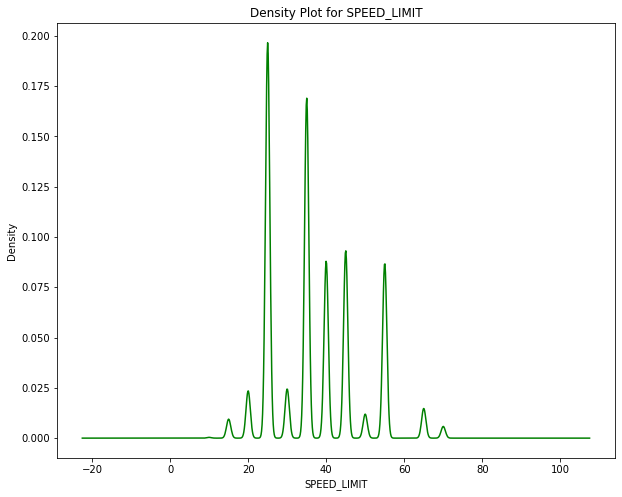

In [48]:
# Density plot about speed limit
plt.figure(figsize=(10, 8))
plt.xlabel("SPEED_LIMIT")
merge4.SPEED_LIMIT.plot.density(color='green')
plt.title('Density Plot for SPEED_LIMIT');

In [49]:
scaler=StandardScaler()
scaler.fit(merge4[['SPEED_LIMIT']])
# Transform the column
merge4['SPEED_LIMIT'] = scaler.transform(merge4[['SPEED_LIMIT']])

### Check if there are null values

In [50]:
merge4.isnull().sum()/len(merge4)

DAMAGE_IND            0.016065
MODEL_YR              0.022965
CRN                   0.000000
OWNER_DRIVER          0.032850
VEH_COLOR_CD          0.018991
AGGRESSIVE_DRIVING    0.000000
ALCOHOL_RELATED       0.000000
CELL_PHONE            0.000000
CORE_NETWORK          0.000000
CURVED_ROAD           0.000000
DISTRACTED            0.000000
DRUGGED_DRIVER        0.000000
YOUNG_DRIVER          0.000000
MATURE_DRIVER         0.000000
SPEEDING_RELATED      0.000000
URBAN                 0.000000
ILLUMINATION          0.000000
LOCATION_TYPE         0.000000
DVR_PED_CONDITION     0.012551
SPEED_LIMIT           0.041834
dtype: float64

As we can see that the highest null value percentage is less than 5% of the whole dataset, so we decide to drop null directly.

In [51]:
merge4=merge4.dropna()
merge4.isnull().sum()

DAMAGE_IND            0
MODEL_YR              0
CRN                   0
OWNER_DRIVER          0
VEH_COLOR_CD          0
AGGRESSIVE_DRIVING    0
ALCOHOL_RELATED       0
CELL_PHONE            0
CORE_NETWORK          0
CURVED_ROAD           0
DISTRACTED            0
DRUGGED_DRIVER        0
YOUNG_DRIVER          0
MATURE_DRIVER         0
SPEEDING_RELATED      0
URBAN                 0
ILLUMINATION          0
LOCATION_TYPE         0
DVR_PED_CONDITION     0
SPEED_LIMIT           0
dtype: int64

### Data points per class
Check how many classes we have

In [52]:
merge4['DAMAGE_IND'].value_counts()

3.0    2300188
1.0     755286
2.0     711361
0.0      68028
Name: DAMAGE_IND, dtype: int64

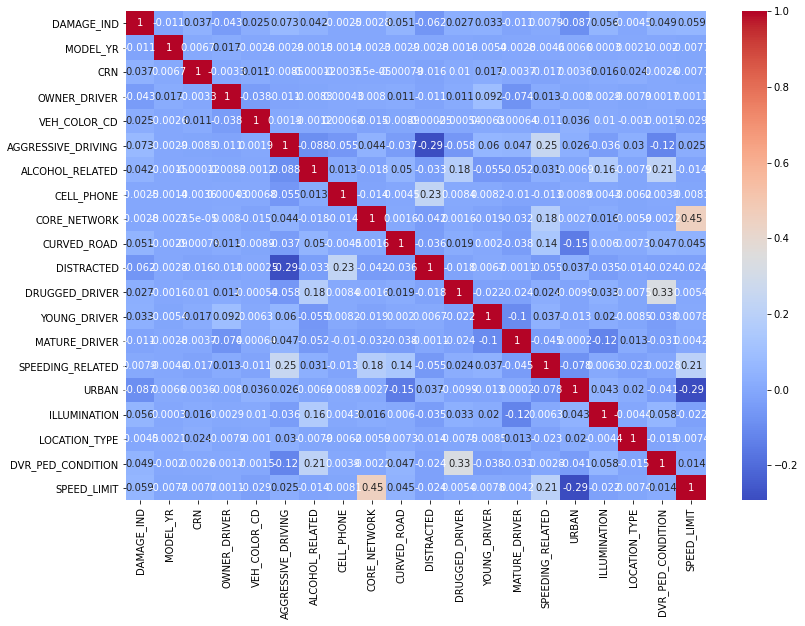

In [53]:
plt.figure(figsize=(13, 9))
corr_matrix = merge4.corr()
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)
plt.show()

In [54]:
corr_scores = corr_matrix['DAMAGE_IND'].abs().sort_values(ascending=False)
corr_scores

DAMAGE_IND            1.000000
URBAN                 0.086504
AGGRESSIVE_DRIVING    0.072586
DISTRACTED            0.061680
SPEED_LIMIT           0.059385
ILLUMINATION          0.055587
CURVED_ROAD           0.050625
DVR_PED_CONDITION     0.048513
OWNER_DRIVER          0.042632
ALCOHOL_RELATED       0.041962
CRN                   0.036536
YOUNG_DRIVER          0.033175
DRUGGED_DRIVER        0.026516
VEH_COLOR_CD          0.025327
MODEL_YR              0.011474
MATURE_DRIVER         0.010905
SPEEDING_RELATED      0.007918
LOCATION_TYPE         0.004459
CORE_NETWORK          0.002837
CELL_PHONE            0.002532
Name: DAMAGE_IND, dtype: float64

According to corralation coefficient, we decide to keep the variables with correlation score greater than 0.05 (i.e. the first 7 variables). 

In [55]:
top_7_var = corr_scores.head(7).index.tolist()
merge4 = merge4[top_7_var]
merge4.sample(10)

,DAMAGE_IND,URBAN,AGGRESSIVE_DRIVING,DISTRACTED,SPEED_LIMIT,ILLUMINATION,CURVED_ROAD
1112570,1.0,1,0,1,-0.155537,1,0
2677374,3.0,1,1,0,-0.588267,1,0
4230869,3.0,0,1,1,0.277194,1,0
4574434,2.0,1,1,0,-1.020997,1,0
3910311,2.0,1,1,0,0.277194,1,0
3365049,3.0,1,0,1,0.277194,3,0
601975,3.0,1,1,0,-0.155537,1,0
1145559,3.0,0,1,0,1.575385,1,0
3559224,3.0,1,1,0,-1.020997,1,0
2544775,3.0,1,1,0,0.277194,1,0


In [56]:
merge4.to_csv('Q3.csv',encoding='utf-8')

### REFERENCES
* Ref 1: https://datatofish.com/correlation-matrix-pandas/
* Ref 2: https://tedboy.github.io/pandas/timeseries/timeseries10.html
* Ref 3: https://www.python-graph-gallery.com/density-plot/